# **Librerias**

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm

import pandas as pd
import seaborn as sns
%matplotlib inline  


# **Comprobación tipos de variables**

In [5]:
# Loading data
s_perf = pd.read_csv("./StudentsPerformance.csv")

In [6]:
s_perf.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
s_perf.shape


(1000, 8)

In [7]:
s_perf["gender"].unique()

array(['female', 'male'], dtype=object)

In [8]:
s_perf["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
s_perf["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
s_perf["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [14]:
s_perf["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [9]:
s_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
s_perf.head(100)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


# **Comprobación Calidad de Datos**

comprobar valores nulos o vacios

In [17]:
s_perf.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

Valores atipicos

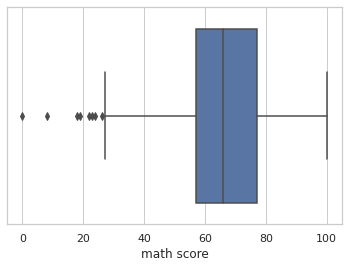

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=s_perf["math score"])

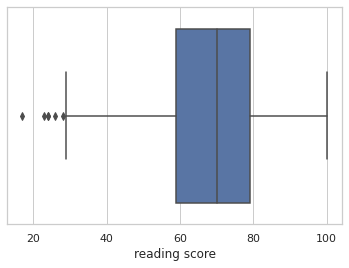

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=s_perf["reading score"])

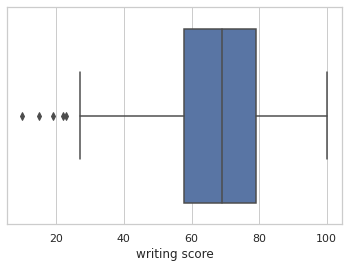

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=s_perf["writing score"])

# **EDA**

# ¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?
¿Hay evidencia de algún sesgo en la distribución de dichos puntajes?


Math Score

In [19]:
s_perf['math score'].mean()

66.089

In [25]:
s_perf['math score'].median()

66.0

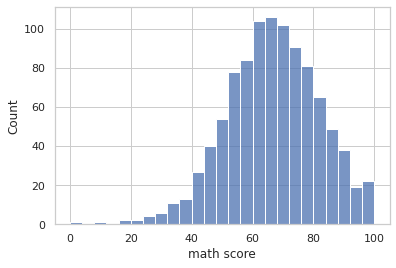

In [28]:
sns.histplot(data=s_perf, x="math score")

Reading Score

In [23]:
s_perf['reading score'].mean()

69.169

In [26]:
s_perf['reading score'].median()

70.0

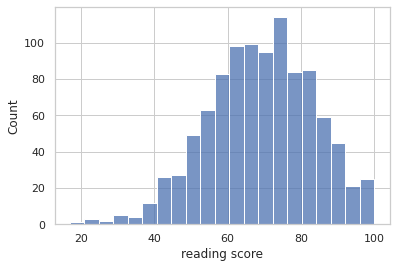

In [29]:
sns.histplot(data=s_perf, x="reading score")

Writting Score

In [24]:
s_perf['writing score'].mean()

68.054

In [27]:
s_perf['writing score'].median()

69.0

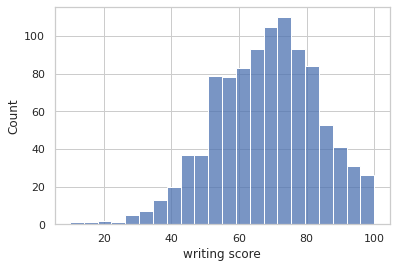

In [30]:
sns.histplot(data=s_perf, x="writing score")

De acuerdo al promedio los estudiantes tienen un mejor desempeño en la asignatura reading de acuerdo al score. Sin embargo podemos ver un sesgo basados en el valor de la mediana y de manera visual usando un histograma.

# ¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?

In [33]:
corr = s_perf.corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Existe un correlación positiva considerable entre los scores de las 3 asignaturas siendo la de mayor valor entre writting y reading con 0.95

# ¿Hay alguna diferencia observable en los puntajes de la asignatura de
# matemáticas entre géneros? ¿Qué género obtuvo en promedio los mejores
# puntajes?


Femenino

In [39]:
male_only=s_perf[s_perf["gender"]=="male"]
female_only=s_perf[s_perf["gender"]=="female"]

In [46]:
female_only.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [45]:
female_only['math score'].mean()

63.633204633204635

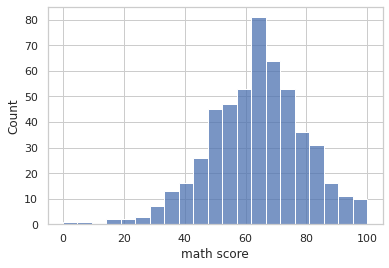

In [41]:
sns.histplot(data=female_only, x="math score")


Masculino

In [47]:
male_only.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


In [44]:
male_only['math score'].mean()

68.72821576763485

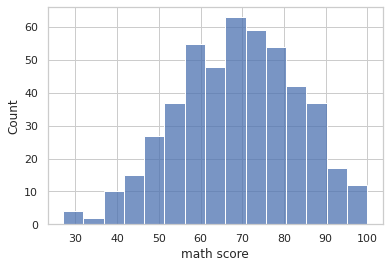

In [42]:
sns.histplot(data=male_only, x="math score")

De acuerdo a los datos suministrados podemos ver diferencias significativas en los scores de la asignatura de matematicas , donde simplemente guiandonos por el rango de los datos podemos ver que para el genero femenino tenemos calificaciones minimas de 0, mientras que en el genero masculino tenemos un valor minimo de 27

Otra caracteristica importante es las medidas de dispersión donde para las observaciones del genero masculino tienen una desviación estandar menor que las encontradas en el genero femenino y los cuatiles estan en numeros ligeramente mas altos.

Esto impacta el score promedio de cada genero, encontrando que para el genero masculino esta en 68.7 y para el femenino en 63.6





# ¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron
## un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se
# distribuye la escolaridad entre esta población?.


In [57]:
p_85=np.percentile(s_perf["writing score"],85)
p_85_stud=s_perf[s_perf["writing score"]>p_85]
p_85_stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
38,female,group D,associate's degree,free/reduced,completed,75,90,88


In [63]:
temp=p_85_stud.groupby("parental level of education").agg({"gender":"count"})
temp

,gender
parental level of education,
associate's degree,36
bachelor's degree,25
high school,8
master's degree,16
some college,34
some high school,16


El nivel de escolaridad de los padres de los alumnos que cumplen este criterio se encuentran en su mayoria en el nivel de escolaridad associate's degree y some college, seguido por bachelor's degree en lo que indica que la mayoria de los padres tienen titulos mas de post secundaria

# ¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a
# 90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para
# los exámenes?


In [80]:
above_90=s_perf.loc[(s_perf['math score']>=90) & (s_perf['writing score']>=90) & (s_perf['reading score']>=90)]
above_90["gender"].count()

28

In [75]:
s_perf.loc[(s_perf['math score']>=90) & (s_perf['writing score']>=90) & (s_perf['reading score']>=90)].count()["gender"]/s_perf.count()["gender"]


0.028

In [84]:
above_90[above_90['test preparation course']=="completed"]["gender"].count()/s_perf.count()["gender"]

0.017

Del total de estudiantes solamente el 2.8 porciento tiene clificacines por encima de 90 y 1.7 % se preparo para el examen